In [1]:
from google.colab import files 
files.upload()

Saving TATASTEEL.csv to TATASTEEL.csv


{'TATASTEEL.csv': b'Date,Open,High,Low,Close,Volume\r\n1/3/2000,148,153.2,146.1,152.45,2003185\r\n1/4/2000,150.1,153,143.05,150.8,1555136\r\n1/5/2000,144.6,162.9,144.6,156.55,3840284\r\n1/6/2000,158.95,169.1,158.95,168.25,2560449\r\n1/7/2000,173.4,179,166.3,171.95,3641691\r\n1/10/2000,173.95,184.9,173.95,182.25,4642054\r\n1/11/2000,179,180,167.7,167.7,1705968\r\n1/12/2000,165,172,159.15,165.3,2337738\r\n1/13/2000,167.9,170,156.05,159.2,1584803\r\n1/14/2000,161,161.9,156,158.7,1541731\r\n1/17/2000,164.95,171.4,163.1,166.8,3326270\r\n1/18/2000,166.9,176,163.25,172.8,3516827\r\n1/19/2000,177,178,171,172.85,2617065\r\n1/20/2000,171,179,160.7,163.1,8257650\r\n1/21/2000,162.7,164.75,159.1,162.4,2794941\r\n1/24/2000,163.9,163.9,150,151.15,2446509\r\n1/25/2000,150,154,147,148.45,3030257\r\n1/27/2000,151.4,153.5,147.5,148.3,1466342\r\n1/28/2000,148,151,143.25,144.5,1996632\r\n1/31/2000,143.1,144,138.6,139.35,1269284\r\n2/1/2000,139.1,142.7,138.6,140.5,1748130\r\n2/2/2000,143.7,145.25,140,141.05

In [2]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import SGD


Using TensorFlow backend.


In [3]:
# DATA PREPROCESSING AND CLEANING 
training_set = pd.read_csv('TATASTEEL.csv')
training_set = training_set.iloc[:,:2].values      #open prices
len(training_set)       #2D array 
# training_set = training_set[~np.isnan(training_set)]
# len(training_set)       #1D array
# new_training_set = [[i] for i in training_set]      #converting back to 2D array
# new_training_set = np.array(new_training_set) 
# new_training_set


4977

In [0]:
# training_set = np.insert(training_set,[0],['date','open'],axis=0)
# training_set

In [0]:
# new_training_set = pd.DataFrame(new_training_set)
new_training_set = training_set[1:,1:2]
dates = training_set[:,:1]
# dates[:3000]
# new_training_set
# dates
# len(dates)

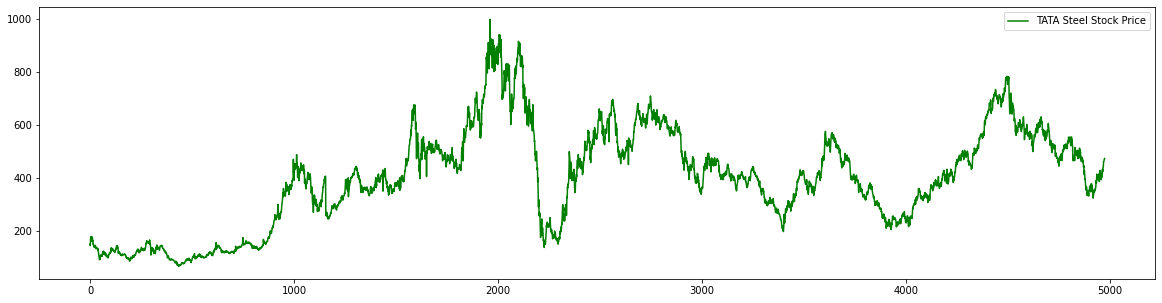

In [6]:
plt.figure(figsize=(20,5))
plt.plot(new_training_set,color="green",label="TATA Steel Stock Price")
plt.legend()
plt.show()

In [7]:
training_set[:,0]


array(['1/3/2000', '1/4/2000', '1/5/2000', ..., '12/27/2019',
       '12/30/2019', '12/31/2019'], dtype=object)

In [0]:
# FEATURE SCALING 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_training_set = sc.fit_transform(new_training_set)

In [0]:
# CREATING INPUT DATA STREAM
x_train = new_training_set[:]
x_new_train=[]
y_train=[]
for i in range(0,3000):
    x_new_train.append([x_train[i:i+50]])
    y_train.append(x_train[i+50])

training_dates = dates[:3000]
x_train = np.reshape(x_new_train,(3000,50,1))
y_train = np.array(y_train)

In [0]:
# BUILDING THE MODEL
model = Sequential()

model.add(LSTM(1000,input_shape=(50,1),return_sequences=True))
model.add(LSTM(500))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dense(1))

In [0]:
# COMPILING MODEL 
model.compile(optimizer="adam",loss="mean_squared_error")

In [12]:
# STRUCTURE OF THE MODEL
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 1000)          4008000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 500)               3002000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 7,074,257
Trainable params: 7,074,257
Non-trainable params: 0
_________________________________________________________________


In [13]:
# TRAINING THE MODEL ON THE TRAINING SET
model.fit(x_train,y_train,batch_size=256,epochs=100)

Epoch 1/100
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0683
Epoch 2/100
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0050
Epoch 3/100
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0020
Epoch 4/100
3000/3000 [==============================] - 6s 2ms/step - loss: 0.0012
Epoch 5/100
3000/3000 [==============================] - 6s 2ms/step - loss: 9.8810e-04
Epoch 6/100
3000/3000 [==============================] - 6s 2ms/step - loss: 8.9505e-04
Epoch 7/100
3000/3000 [==============================] - 6s 2ms/step - loss: 9.2124e-04
Epoch 8/100
3000/3000 [==============================] - 6s 2ms/step - loss: 8.5755e-04
Epoch 9/100
3000/3000 [==============================] - 6s 2ms/step - loss: 8.6907e-04
Epoch 10/100
3000/3000 [==============================] - 6s 2ms/step - loss: 7.7141e-04
Epoch 11/100
3000/3000 [==============================] - 6s 2ms/step - loss: 7.8847e-04
Epoch 12/100
3000/3000 [======================

In [0]:
# SAVING THE MODEL
model.save("model.h5")

# ***PREDICTION***

In [0]:
# IMPORTING LIBRARIES
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
# LOADING SAVED MODEL
model = load_model("model.h5")

In [17]:
# DATA PREPROCESSING AND CLEANING
test_set = pd.read_csv('TATASTEEL.csv')
test_set = test_set.iloc[:,1:2].values #open prices
len(test_set)
test_set #2D array 
test_set = test_set[~np.isnan(test_set)]
test_set #1D array
len(test_set)
new_test_set = [[i] for i in test_set] #converting back to 2D array
new_test_set = np.array(new_test_set) 
new_test_set

array([[148.  ],
       [150.1 ],
       [144.6 ],
       ...,
       [469.25],
       [470.1 ],
       [472.65]])

In [18]:
# RETRIEVING REAL VALUES FROM TABLE 
real = []
for i in range(3000,4900):
    real.append(new_test_set[i+50])
    

real = np.array(real)
len(real)

1900

In [0]:
# NORMALIZATION
sc = MinMaxScaler()
new_test_set = sc.fit_transform(new_test_set)

In [0]:
# CREATING INPUT STREAM OF DATA 
x_train = new_test_set[:]
x_test=[]
y_test=[]
for i in range(3000,4900):
    x_test.append([x_train[i:i+50]])
    y_test.append(x_train[i+50])

x_test=np.reshape(x_test,(1900,50,1))
y_test=np.array(y_test)

In [38]:
test_dates = dates[3050:4950]


array([['3/15/2012'],
       ['3/16/2012'],
       ['3/19/2012'],
       ...,
       ['11/19/2019'],
       ['11/20/2019'],
       ['11/21/2019']], dtype=object)

In [24]:
# CHECKING LEN OF DATES AND TEST SET 
len(test_dates)
len(y_test)
len(real)

1900

In [0]:
# PREDICTION 
pred = model.predict(x_test)

In [0]:
# GETTING INVERSE TRANSFORMED VALUES OF PREDICTIONS 
pred = sc.inverse_transform(pred)
y_test = sc.inverse_transform(y_test)

In [27]:
pred
# for i in range(3000):
#     pred = np.insert(pred,0,[math.nan])

array([[468.72107],
       [469.75766],
       [466.98828],
       ...,
       [397.01126],
       [405.16278],
       [407.4745 ]], dtype=float32)

In [30]:
y_test

array([[461.5],
       [463. ],
       [455. ],
       ...,
       [414. ],
       [401. ],
       [399. ]])

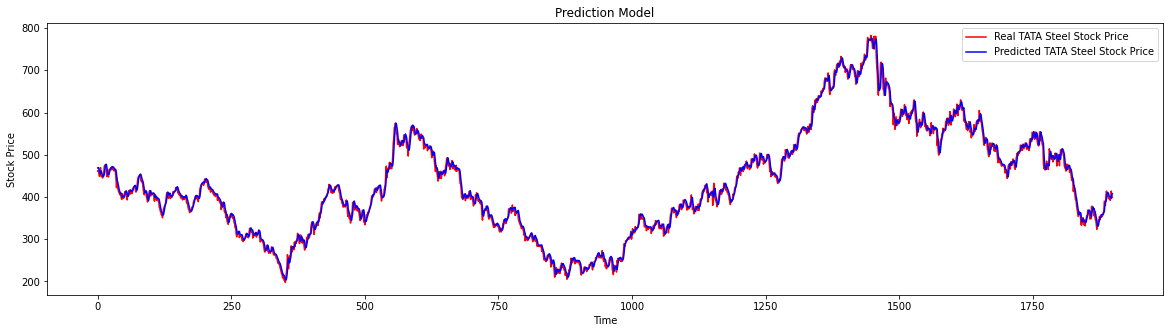

In [31]:
# VISUALIZATION OF PREDICTIONS VS REAL DATA
plt.figure(figsize=(20,5))
plt.plot(y_test,color="red",label="Real TATA Steel Stock Price")
plt.plot(pred,color="blue",label="Predicted TATA Steel Stock Price")
plt.title("Prediction Model")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()    
plt.show()

In [33]:
# CALCULATION OF RMSE VALUE
rmse = math.sqrt(mean_squared_error(y_test,pred))
print("rmse is:", '{0:.2f}'.format((rmse/1900)*100),"%")

rmse is: 0.58 %


In [34]:
len(test_dates)

1900

In [35]:
len(pred)

1900

In [50]:
y_test

array([[461.5],
       [463. ],
       [455. ],
       ...,
       [414. ],
       [401. ],
       [399. ]])

In [0]:
predictions = []
for i in range(len(pred)):
    predictions.append([test_dates[i][0], pred[i][0], y_test[i][0]])


In [52]:
print(predictions)

[['3/15/2012', 468.72107, 461.5], ['3/16/2012', 469.75766, 463.0], ['3/19/2012', 466.98828, 455.0], ['3/20/2012', 461.8691, 449.0], ['3/21/2012', 456.30368, 452.85], ['3/22/2012', 454.71222, 469.49999999999994], ['3/23/2012', 462.07666, 449.15], ['3/26/2012', 460.1329, 448.1], ['3/27/2012', 454.373, 449.9], ['3/28/2012', 450.9358, 444.9], ['3/29/2012', 448.36423, 450.1], ['3/30/2012', 449.5807, 453.7], ['4/2/2012', 453.03616, 470.8500000000001], ['4/3/2012', 462.83594, 475.55000000000007], ['4/4/2012', 472.5256, 474.3999999999999], ['4/9/2012', 477.18298, 472.4], ['4/10/2012', 477.19577, 459.45], ['4/11/2012', 470.41623, 448.3], ['4/12/2012', 459.75998, 450.65], ['4/13/2012', 453.7089, 458.0], ['4/16/2012', 455.22736, 447.3], ['4/17/2012', 453.71683, 464.9], ['4/18/2012', 458.5281, 464.45], ['4/19/2012', 463.38086, 466.65], ['4/20/2012', 467.02048, 465.6], ['4/23/2012', 468.35376, 470.0], ['4/24/2012', 470.44543, 464.0], ['4/25/2012', 469.5902, 471.99999999999994], ['4/26/2012', 471.46

In [53]:
predictions = pd.DataFrame(predictions)
predictions

,0,1,2
0,3/15/2012,468.721069,461.50
1,3/16/2012,469.757660,463.00
2,3/19/2012,466.988281,455.00
3,3/20/2012,461.869110,449.00
4,3/21/2012,456.303680,452.85
...,...,...,...
1895,11/15/2019,400.580841,392.00
1896,11/18/2019,397.657684,396.40
1897,11/19/2019,397.011261,414.00
1898,11/20/2019,405.162781,401.00


# ***PREDICTION OF FAR FUTURE***

In [0]:
# IMPORTING LIBRARIES
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [59]:
# DATA PREPROCESSING AND CLEANING
test_set = pd.read_csv('TATASTEEL.csv')
test_set = test_set.iloc[:,1:2].values #open prices
len(test_set)
test_set #2D array 
test_set = test_set[~np.isnan(test_set)]
test_set #1D array
len(test_set)
new_test_set = [[i] for i in test_set] #converting back to 2D array
new_test_set = np.array(new_test_set) 
new_test_set

array([[148.  ],
       [150.1 ],
       [144.6 ],
       ...,
       [469.25],
       [470.1 ],
       [472.65]])

In [0]:
# NORMALIZATION
sc = MinMaxScaler()
new_test_set = sc.fit_transform(new_test_set)

*Creating a function which predicts future values and then appends those values to x_train and calls the function recursively so that it goes on and on till wished in the future.*

In [0]:
# CREATING INPUT STREAM OF DATA 
x_train = new_test_set[:]
x_test=[]
y_test=[]
for i in range(3000,4900):
    x_test.append([x_train[i:i+50]])
    y_test.append(x_train[i+50])

x_test=np.reshape(x_test,(1900,50,1))
y_test=np.array(y_test)

In [0]:
# PREDICTION 
pred = model.predict(x_test)

In [0]:
# GETTING INVERSE TRANSFORMED VALUES OF PREDICTIONS 
pred = sc.inverse_transform(pred)
y_test = sc.inverse_transform(y_test)